In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
 99% 774M/786M [00:12<00:00, 102MB/s]
100% 786M/786M [00:12<00:00, 64.5MB/s]


In [ ]:
!pip install zipfile36
import zipfile
zip_ref=zipfile.ZipFile('/content/skin-cancer9-classesisic.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
   

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
import pathlib
import random
from skimage import color
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from numpy import asarray
from skimage.feature import hog
from keras.preprocessing.image import load_img, img_to_array
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage import io, color
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog, local_binary_pattern
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from skimage.transform import resize
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.optimizers import RMSprop
from catboost import CatBoostClassifier
from tensorflow.keras.losses import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
import os
import cv2
import numpy as np

def read_and_resize_images(train_image, target_size=(224, 224)):
    train_image_arrays = []
    for label in os.listdir(train_image):
        label_folder = os.path.join(train_image, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                image_path = os.path.join(label_folder, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    resized_image = cv2.resize(image, target_size)
                    train_image_arrays.append(resized_image.flatten())

    return np.array(train_image_arrays)



In [ ]:
def read_labels(train_image_label):
    train_labels = []

    for label in os.listdir(train_image_label):
        label_folder = os.path.join(train_image_label, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                train_labels.append(label)

    return np.array(train_labels)

In [ ]:
def read_and_resize_images(test_image, target_size=(224, 224)):
    test_image_arrays = []
    for label in os.listdir(test_image):
        label_folder = os.path.join(test_image, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                image_path = os.path.join(label_folder, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    resized_image = cv2.resize(image, target_size)
                    test_image_arrays.append(resized_image.flatten())

    return np.array(test_image_arrays)

In [ ]:
def read_labels(test_image_label):
    test_labels = []

    for label in os.listdir(test_image_label):
        label_folder = os.path.join(test_image_label, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                test_labels.append(label)

    return np.array(test_labels)

In [ ]:
train_folder='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_folder='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [ ]:
train_image_arrays=read_and_resize_images(train_folder)
test_image_arrays=read_and_resize_images(test_folder)

In [ ]:
train_labels=read_labels(train_folder)
test_labels=read_labels(test_folder)

In [ ]:
train_images=train_image_arrays.reshape(-1,224,224,3)
test_images=test_image_arrays.reshape(-1,224,32,3)

In [ ]:
train_labels.shape

(2239,)

In [ ]:
train_image_arrays.shape

(2239, 3072)

In [ ]:
normalize_train_images=train_images/255.0
normalize_test_images=test_images/255.0

In [ ]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
      gray_image = color.rgb2gray(image)
      hog_feature = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
      hog_features.append(hog_feature)
    return np.array(hog_features)

In [ ]:
def extract_lbp_features(images):
  lbp_features=[]
  for image in images:
    gray_image=color.rgb2gray(image)
    lbp_feature=local_binary_pattern(gray_image, 8,1,method="uniform")
    lbp_hist,_=np.histogram(lbp_feature.ravel(),bins=np.arange(0,10),range=(0,9))
    lbp_features.append(lbp_hist)
  return np.array(lbp_features)

In [ ]:
def extract_color_histogram(images):
  color_hist_features=[]
  for image in images:
    if len(image.shape) == 3:
      color_hist=[]
      for channel in range (image.shape[2]):
          hist,_=np.histogram(image[:,:,channel],bins=10,range=(0,256))
          color_hist.extend(hist)

    else:
      hist,_=np.histogram(image,bins=10,range=(0,256))
      color_hist=hist
    color_hist_features.append(color_hist)

  return np.array(color_hist_features)

In [ ]:
def extract_deep_feature_images(images):
  base_model=VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))
  model=Model(inputs=base_model.input,outputs=base_model.get_layer('block5_pool').output)
  deep_features=model.predict(images)
  return deep_features.reshape(len(images), -1)


In [ ]:
extract_hog_train_features=extract_hog_features(normalize_train_images)
extract_hog_test_features=extract_hog_features(normalize_test_images)

In [ ]:
extract_train_lbp_features=extract_lbp_features(normalize_train_images)
extract_test_lbp_features=extract_lbp_features(normalize_test_images)

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:
extract_train_hist=extract_color_histogram(normalize_train_images)
extract_test_hist=extract_color_histogram(normalize_test_images)

In [ ]:
extract_train_deep=extract_deep_feature_images(normalize_train_images)
extract_test_deep=extract_deep_feature_images(normalize_test_images)

4/4 [==============================] - 1s 273ms/step


In [ ]:
all_train_feature=np.concatenate((extract_hog_train_features,extract_train_lbp_features,extract_train_hist,extract_train_deep),axis=1)
all_test_feature=np.concatenate((extract_hog_test_features,extract_test_lbp_features,extract_test_hist,extract_test_deep),axis=1)

In [ ]:
all_train_feature=np.array(all_train_feature)
all_test_feature=np.array(all_test_feature)


In [ ]:
le=LabelEncoder()
all_train_labels=le.fit_transform(train_labels)
all_test_labels=le.fit_transform(test_labels)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(all_train_feature,all_train_labels,test_size=0.2,random_state=76)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
dt=DecisionTreeClassifier(max_depth=18,min_samples_split=3)
dt.fit(x_train,y_train)
predict=dt.predict(x_train)
accuracy=accuracy_score(predict,y_train)
print(accuracy)

0.9223897264098269


In [ ]:
dt.fit(x_test,y_test)
predict=dt.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(accuracy)

0.9508928571428571


In [ ]:
cm=confusion_matrix(predict,y_test)
report=classification_report(y_test,predict)
print(cm)
print(report)

[[26  1  0  0  3  0  1  0  0]
 [ 0 73  2  0  0  2  0  1  0]
 [ 0  0 18  1  0  2  0  0  0]
 [ 0  0  0 91  0  1  6  0  0]
 [ 0  0  0  0 72  2  0  0  1]
 [ 0  0  0  0  0 77  0  0  0]
 [ 0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       0.94      0.99      0.96        74
           2       0.86      0.90      0.88        20
           3       0.93      0.99      0.96        92
           4       0.96      0.96      0.96        75
           5       1.00      0.92      0.96        84
           6       1.00      0.59      0.74        17
           7       1.00      0.97      0.98        32
           8       1.00      0.96      0.98        28

    accuracy                           0.95       448
   macro avg       0.95      0.92      0.93       448
weighted avg       0.95      0.95      0.95       448



In [ ]:
sv=SVC()
sv.fit(x_train,y_train)
predict=sv.predict(x_train)
accuracy=accuracy_score(predict,y_train)
print(accuracy)

0.7548855388051368


In [ ]:
sv.fit(x_test,y_test)
predict=sv.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(accuracy)

0.6763392857142857


In [ ]:
cm=confusion_matrix(predict,y_test)
report=classification_report(y_test,predict)
print(cm)
print(report)

[[  0   0   0   0   0   0   0   0   0]
 [  4  59   5   2   4   2   1   8   5]
 [  0   0   1   0   0   0   0   0   0]
 [  0   0   2  63   3   1   9   1   0]
 [  2   0   2   1  52   0   2   0   0]
 [ 18  15  10  13  10 100   5  17   2]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0]
 [  0   1   0   0   0   0   0   0  26]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.66      0.79      0.72        75
           2       1.00      0.05      0.10        20
           3       0.80      0.80      0.80        79
           4       0.88      0.75      0.81        69
           5       0.53      0.97      0.68       103
           6       0.00      0.00      0.00        17
           7       1.00      0.07      0.13        28
           8       0.96      0.79      0.87        33

    accuracy                           0.68       448
   macro avg       0.65      0.47      0.46       44

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predict=knn.predict(x_train)
accuracy=accuracy_score(predict,y_train)
print(accuracy)

0.5773310999441653


In [ ]:
knn.fit(x_test,y_test)
predict=knn.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(accuracy)

0.5513392857142857


In [ ]:
cm=confusion_matrix(predict,y_test)
report=classification_report(predict,y_test)
print(cm)
print(report)

[[19  5  0  2  7 14  2  5  2]
 [ 2 47  4  6  5  8  0  7  9]
 [ 1  0  4  1  2  2  0  0  0]
 [ 0  5  4 56 13  9 10  1  1]
 [ 0  1  1  6 34  6  3  1  1]
 [ 1 12  5  7  8 63  2  6  3]
 [ 0  0  0  0  0  0  0  0  0]
 [ 1  4  1  0  0  0  0  7  0]
 [ 0  1  1  1  0  1  0  1 17]]
              precision    recall  f1-score   support

           0       0.79      0.34      0.47        56
           1       0.63      0.53      0.58        88
           2       0.20      0.40      0.27        10
           3       0.71      0.57      0.63        99
           4       0.49      0.64      0.56        53
           5       0.61      0.59      0.60       107
           6       0.00      0.00      0.00         0
           7       0.25      0.54      0.34        13
           8       0.52      0.77      0.62        22

    accuracy                           0.55       448
   macro avg       0.47      0.49      0.45       448
weighted avg       0.62      0.55      0.57       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ada=AdaBoostClassifier(learning_rate=0.1)
ada.fit(x_train,y_train)
predict=ada.predict(x_train)
accuracy=accuracy_score(predict,y_train)
print(accuracy)

0.3852596314907873


In [ ]:
ada.fit(x_test,y_test)
predict=ada.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(accuracy)

0.30357142857142855


In [ ]:
cm=confusion_matrix(predict,y_test)
report=classification_report(predict,y_test)
print(cm)
print(report)

[[ 0  0  0  0  0  0  0  0  0]
 [ 1 30  3  0  2  8  0  4 16]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 10  1  2  0  0]
 [ 0  0  0  0  5  0  1  0  0]
 [23 45 17 74 52 94 14 24 15]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.40      0.47      0.43        64
           2       0.00      0.00      0.00         0
           3       0.06      0.28      0.10        18
           4       0.07      0.83      0.13         6
           5       0.91      0.26      0.41       358
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.06      1.00      0.11         2

    accuracy                           0.30       448
   macro avg       0.17      0.32      0.13       448
weighted avg       0.79      0.30      0.39       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
predict=xg.predict(x_train)
accuracy=accuracy_score(predict,y_train)
print(accuracy)

0.9547738693467337


In [ ]:
xg.fit(x_test,y_test)
predict=xg.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(accuracy)

0.9888392857142857


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        24
           3       1.00      0.97      0.98       101
           4       0.98      0.98      0.98        62
           5       1.00      1.00      1.00        95
           6       0.77      1.00      0.87        10
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        22

    accuracy                           0.99       448
   macro avg       0.97      0.99      0.98       448
weighted avg       0.99      0.99      0.99       448



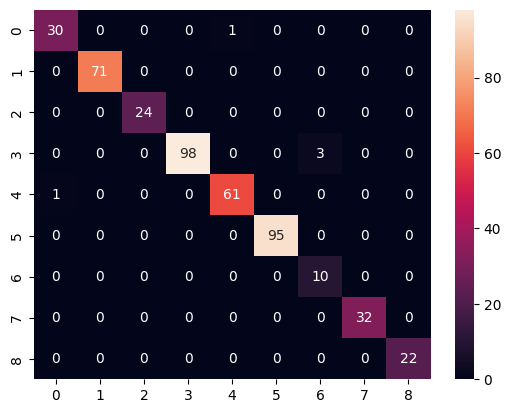

In [ ]:
import seaborn as sns
cm=confusion_matrix(predict,y_test)
report=classification_report(predict,y_test)
sns.heatmap(cm,annot=True)
print(report)

In [ ]:
cat=CatBoostClassifier(iterations=30)
cat.fit(x_train,y_train)
predict=cat.predict(x_train)
accuracy=accuracy_score(predict,y_train)
print(accuracy)

Learning rate set to 0.5
0:	learn: 1.8821678	total: 4.04s	remaining: 1m 57s
1:	learn: 1.7429627	total: 5.98s	remaining: 1m 23s
2:	learn: 1.6565251	total: 7.5s	remaining: 1m 7s
3:	learn: 1.5985191	total: 9.06s	remaining: 58.9s
4:	learn: 1.5526581	total: 10.5s	remaining: 52.6s
5:	learn: 1.5052959	total: 11.5s	remaining: 46.1s
6:	learn: 1.4712168	total: 12.5s	remaining: 41.1s
7:	learn: 1.4273161	total: 13.5s	remaining: 37.2s
8:	learn: 1.3837325	total: 14.5s	remaining: 33.9s
9:	learn: 1.3450306	total: 16.2s	remaining: 32.3s
10:	learn: 1.2832559	total: 17.7s	remaining: 30.6s
11:	learn: 1.2560785	total: 19.1s	remaining: 28.7s
12:	learn: 1.2213153	total: 20.1s	remaining: 26.3s
13:	learn: 1.2007429	total: 21.1s	remaining: 24.1s
14:	learn: 1.1821481	total: 22.1s	remaining: 22.1s
15:	learn: 1.1553331	total: 23.1s	remaining: 20.2s
16:	learn: 1.1264641	total: 24.1s	remaining: 18.5s
17:	learn: 1.1049569	total: 25.2s	remaining: 16.8s
18:	learn: 1.0675768	total: 26.2s	remaining: 15.2s
19:	learn: 1.04

In [ ]:
cat.fit(x_test,y_test)
predict=cat.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(accuracy)

Learning rate set to 0.5
0:	learn: 1.9990630	total: 1.26s	remaining: 36.5s
1:	learn: 1.8408800	total: 2.1s	remaining: 29.4s
2:	learn: 1.7250983	total: 2.94s	remaining: 26.5s
3:	learn: 1.6233485	total: 3.8s	remaining: 24.7s
4:	learn: 1.5250617	total: 4.62s	remaining: 23.1s
5:	learn: 1.4359999	total: 5.46s	remaining: 21.9s
6:	learn: 1.3707509	total: 6.29s	remaining: 20.7s
7:	learn: 1.3147403	total: 7.12s	remaining: 19.6s
8:	learn: 1.2652198	total: 8.52s	remaining: 19.9s
9:	learn: 1.2105219	total: 9.86s	remaining: 19.7s
10:	learn: 1.1614792	total: 11.3s	remaining: 19.6s
11:	learn: 1.1175765	total: 12.2s	remaining: 18.3s
12:	learn: 1.0636450	total: 13s	remaining: 17s
13:	learn: 1.0167709	total: 13.9s	remaining: 15.8s
14:	learn: 0.9625867	total: 14.7s	remaining: 14.7s
15:	learn: 0.9202529	total: 15.5s	remaining: 13.6s
16:	learn: 0.8790066	total: 16.3s	remaining: 12.5s
17:	learn: 0.8311714	total: 17.1s	remaining: 11.4s
18:	learn: 0.7874194	total: 18s	remaining: 10.4s
19:	learn: 0.7424765	tot

In [ ]:
cm=confusion_matrix(predict,y_test)
report=classification_report(predict,y_test)
print(cm)
print(report)

[[ 19   0   0   0   2   0   0   0   0]
 [  0  75   0   0   0   0   0   0   0]
 [  0   0  18   0   0   0   0   0   0]
 [  0   0   0  79   0   0   6   0   0]
 [  4   0   0   0  66   0   1   0   0]
 [  1   0   1   0   1 103   0   2   0]
 [  0   0   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0   0  26   0]
 [  0   0   1   0   0   0   0   0  33]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       1.00      1.00      1.00        75
           2       0.90      1.00      0.95        18
           3       1.00      0.93      0.96        85
           4       0.96      0.93      0.94        71
           5       1.00      0.95      0.98       108
           6       0.59      1.00      0.74        10
           7       0.93      1.00      0.96        26
           8       1.00      0.97      0.99        34

    accuracy                           0.96       448
   macro avg       0.91      0.97      0.93       44

In [ ]:
clf=DecisionTreeClassifier(max_depth=18,min_samples_split=3)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=18, min_samples_split=3)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [ ]:
def plot_multiclass_roc(clf,x_test,y_test,n_classes,figsize=(15,15)):
  y_score=clf.predict_proba(x_test)
  fpr=dict()
  tpr=dict()
  roc_auc=dict()
  y_test_dummies=pd.get_dummies(y_test,drop_first=False).values
  for i in range(n_classes):
    fpr[i],tpr[i],thresholds=roc_curve(y_test_dummies[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    j=tpr[i]-fpr[i]
    optimal_idx = np.argmax(j)
    thresholds[i] = thresholds[optimal_idx]

  fig,ax=plt.subplots(figsize=figsize)
  ax.plot([0,1],[0,1],'k--')
  ax.set_xlim([0.0,1.0])
  ax.set_ylim([0.0,1.05])
  ax.set_xlabel("false positive rate")
  ax.set_ylabel("true positive rate")
  ax.set_title("reciever operating characteristic example")
  for i in range(n_classes):
    ax.plot(fpr[i],tpr[i],label='ROC curve(area=%0.2f) for label %i'%(roc_auc[i],i))
    ax.plot(fpr[i][optimal_idx], tpr[i][optimal_idx], 'o', markersize=8, label=f'Optimal threshold for label {i}: {thresholds[i]:0.2f}')
  ax.legend(loc="best")
  ax.grid(alpha=.4)
  plt.show()






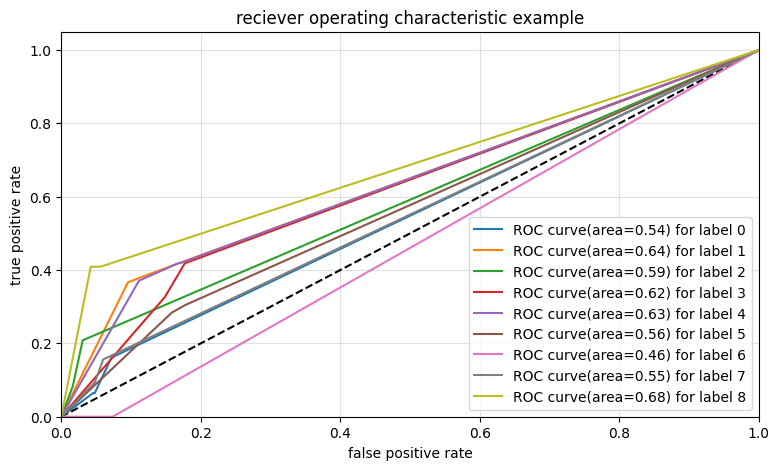

In [ ]:
plot_multiclass_roc(clf,x_test,y_test,n_classes=9,figsize=(9,5))

In [ ]:
sv=SVC(probability=True)
sv.fit(x_train,y_train)

SVC(probability=True)

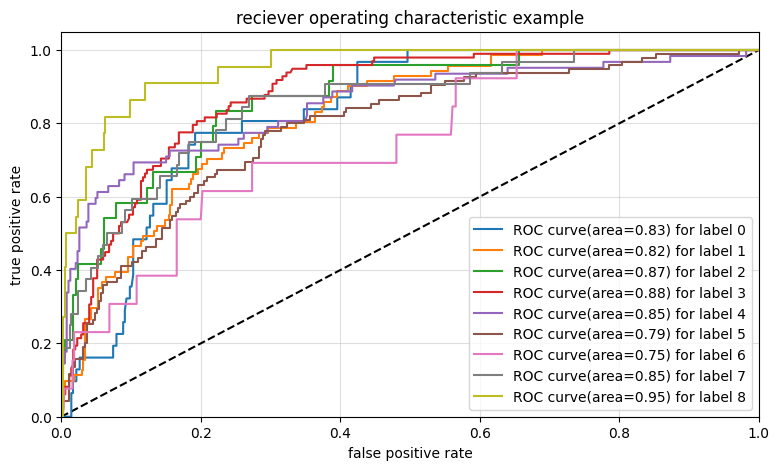

In [ ]:
plot_multiclass_roc(sv,x_test,y_test,n_classes=9,figsize=(9,5))

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

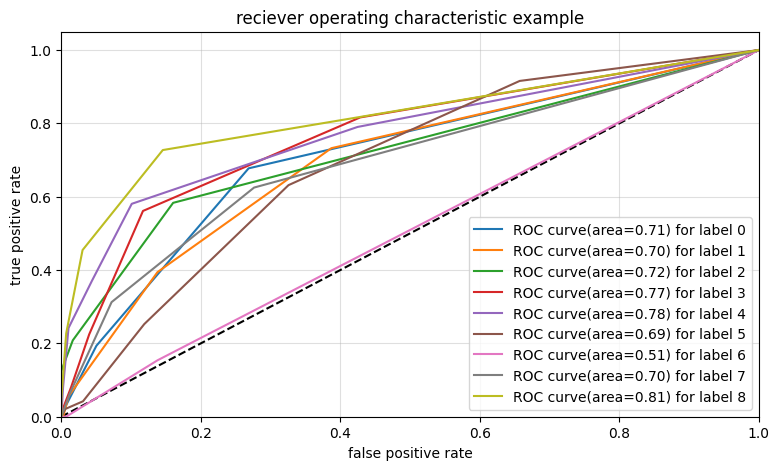

In [ ]:
plot_multiclass_roc(knn,x_test,y_test,n_classes=9,figsize=(9,5))

In [ ]:
ada=AdaBoostClassifier(learning_rate=0.1)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1)

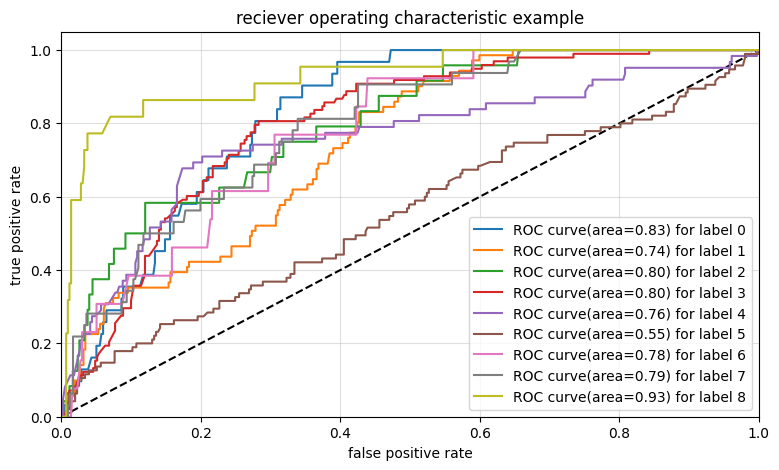

In [ ]:
plot_multiclass_roc(ada,x_test,y_test,n_classes=9,figsize=(9,5))

In [ ]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

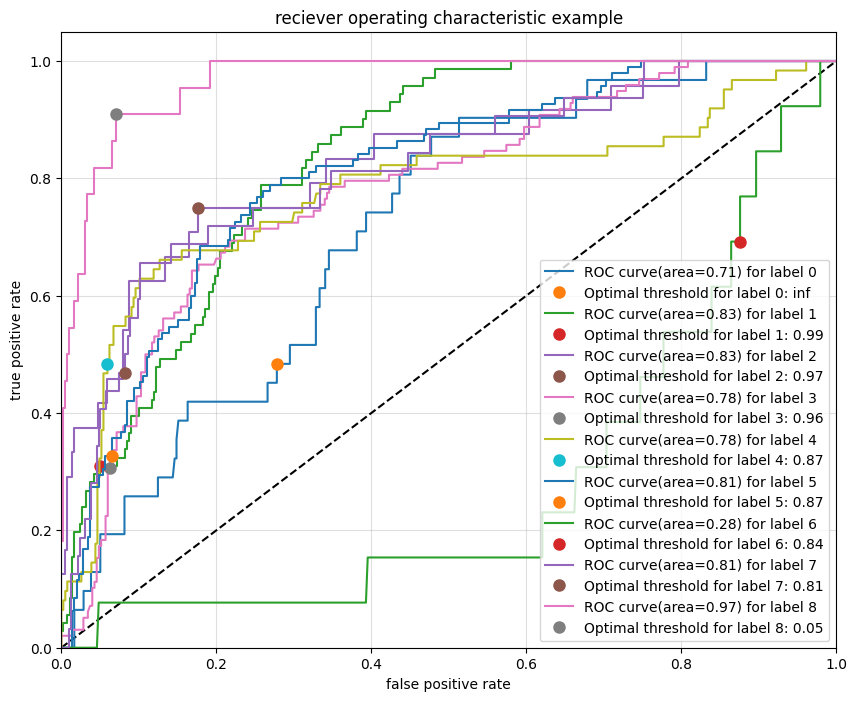

In [ ]:
plot_multiclass_roc(xg,x_test,y_test,n_classes=9,figsize=(10,8))

In [ ]:
cat=CatBoostClassifier(iterations=30)
cat.fit(x_train,y_train)

Learning rate set to 0.5
0:	learn: 1.9104036	total: 4.16s	remaining: 2m
1:	learn: 1.8099558	total: 5.62s	remaining: 1m 18s
2:	learn: 1.7352317	total: 7.01s	remaining: 1m 3s
3:	learn: 1.6240327	total: 8.55s	remaining: 55.6s
4:	learn: 1.5320283	total: 10.3s	remaining: 51.4s
5:	learn: 1.4895745	total: 12.7s	remaining: 50.9s
6:	learn: 1.4509626	total: 14.6s	remaining: 47.9s
7:	learn: 1.4196674	total: 16s	remaining: 43.9s
8:	learn: 1.3720692	total: 17.4s	remaining: 40.6s
9:	learn: 1.3346623	total: 19.8s	remaining: 39.7s
10:	learn: 1.2969103	total: 21.1s	remaining: 36.5s
11:	learn: 1.2659392	total: 22.6s	remaining: 33.9s
12:	learn: 1.2362713	total: 24s	remaining: 31.3s
13:	learn: 1.1987321	total: 26.3s	remaining: 30s
14:	learn: 1.1745770	total: 28.4s	remaining: 28.4s
15:	learn: 1.1464990	total: 29.8s	remaining: 26.1s
16:	learn: 1.1315724	total: 31.3s	remaining: 23.9s
17:	learn: 1.0934892	total: 32.8s	remaining: 21.8s
18:	learn: 1.0700914	total: 34.1s	remaining: 19.7s
19:	learn: 1.0359083	tot

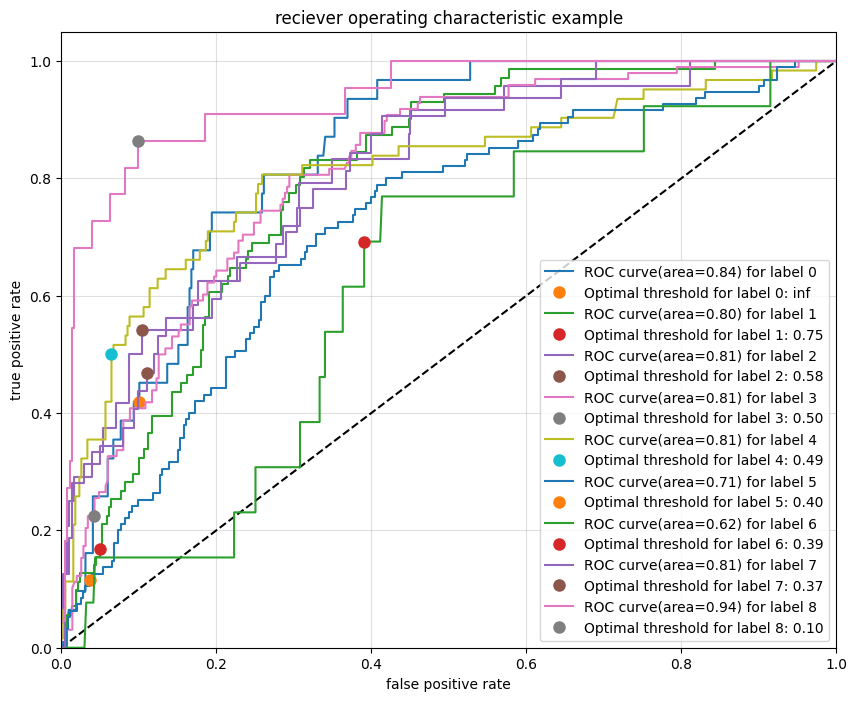

In [ ]:
plot_multiclass_roc(cat,x_test,y_test,n_classes=9,figsize=(10,8))